In [1]:
import numpy as np, analysis as ana, prjlib, plottools as pl, binning as bins
from matplotlib.pyplot import *

In [2]:
p, __ = prjlib.filename_init(PSA='s14&15_cross',stype='lcmb',doreal='True',dearot='',rlmin='200',ver='')
Lmin=20
mb = bins.multipole_binning(10,spc='p2',lmin=Lmin,lmax=2048)
ocb = prjlib.binned_cl(p.quad.f['EB'].cl[0],mb)
scb = prjlib.binned_cl_rlz(p.quad.f['EB'].cl,1,200,mb)
mcb = np.mean(scb,axis=0)
vcb = np.std(scb,axis=0)

In [3]:
st = ana.PTEs(ocb,scb)

chi^2: 7.3 , chi^2 (sim): 10.6 , PTE: 0.70 


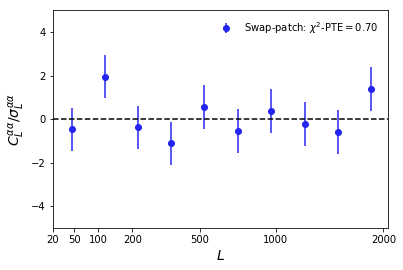

In [4]:
pl.plot_1dstyle(spc='p2',ylab=r'$C_L^{\alpha\alpha}/\sigma_L^{\alpha\alpha}$',xmin=Lmin,xlabsize=14,ylabsize=14,ymin=-5,ymax=5)
errorbar(np.sqrt(mb.bc),(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label=r'Swap-patch: $\chi^2$-PTE$='+'{:.2f}'.format(st.px2)+'$')
axhline(0,color='k',ls='--')
legend(loc=0,frameon=False)
savefig('fig_cross.eps')

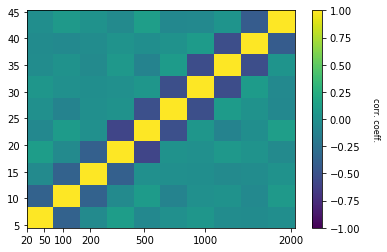

In [5]:
pl.plot_corr(scb,mb.bp,spc='p2',clab='corr. coeff.')